In [4]:
import os, sys
import requests
import json
import base64
from io import BytesIO
from PIL import Image
from typing import List
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import display

In [5]:
load_dotenv()

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')

if not OPENAI_API_KEY:
    print("OPENAI_API_KEY not loaded.")
    sys.exit(1)

openai = OpenAI()

In [6]:
def artist(city):
    img_response = openai.images.generate(
        model="dall-e-3",
        prompt=f"An image representing city {city}, showing tourist spots and everything unique about {city}, in a vibrant pop-art style",
        size="1024x1024",
        n=1,
        response_format="b64_json"
    )
    img_b64 = img_response.data[0].b64_json
    img_data = base64.b64decode(img_b64)
    return Image.open(BytesIO(img_data))

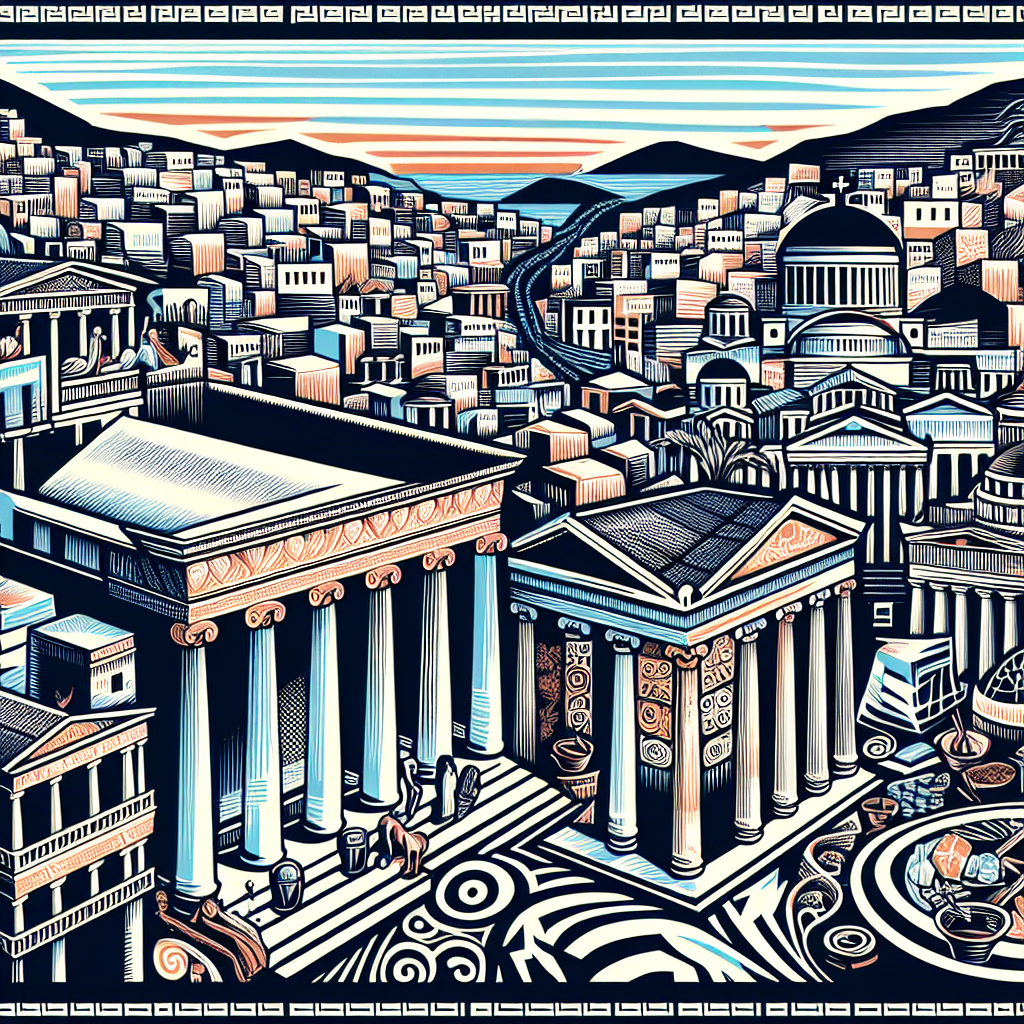

In [7]:
image = artist("Athens")
display(image)